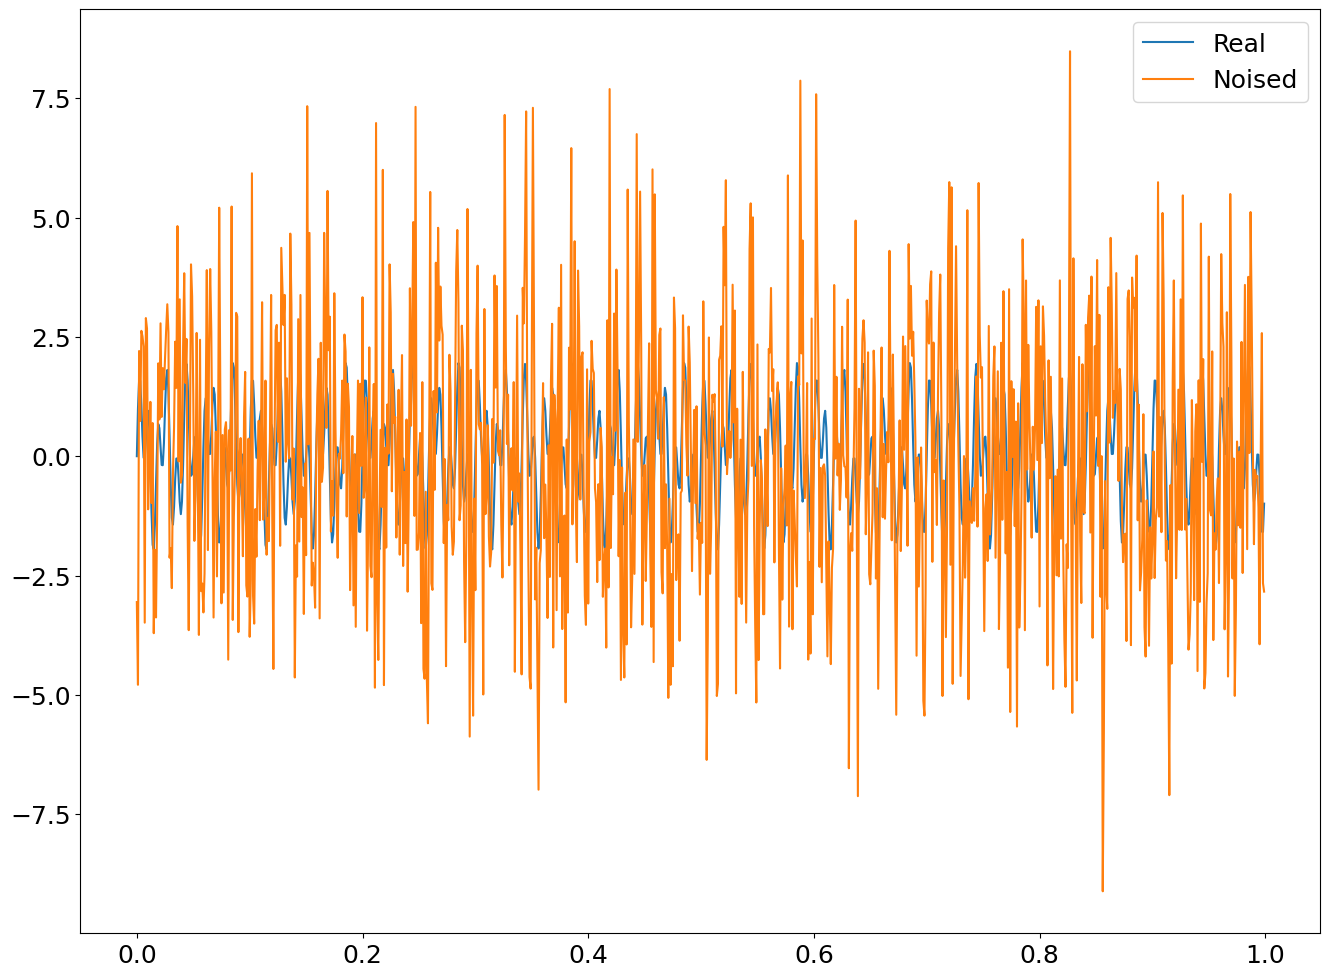

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16,12]
plt.rcParams.update({'font.size': 18})

dt = 0.001
t = np.arange(0,1,dt)
f = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t)
f_noise = f + 2.5*np.random.randn(len(t))

plt.plot(t,f)
plt.plot(t,f_noise)
plt.legend(["Real", "Noised"])

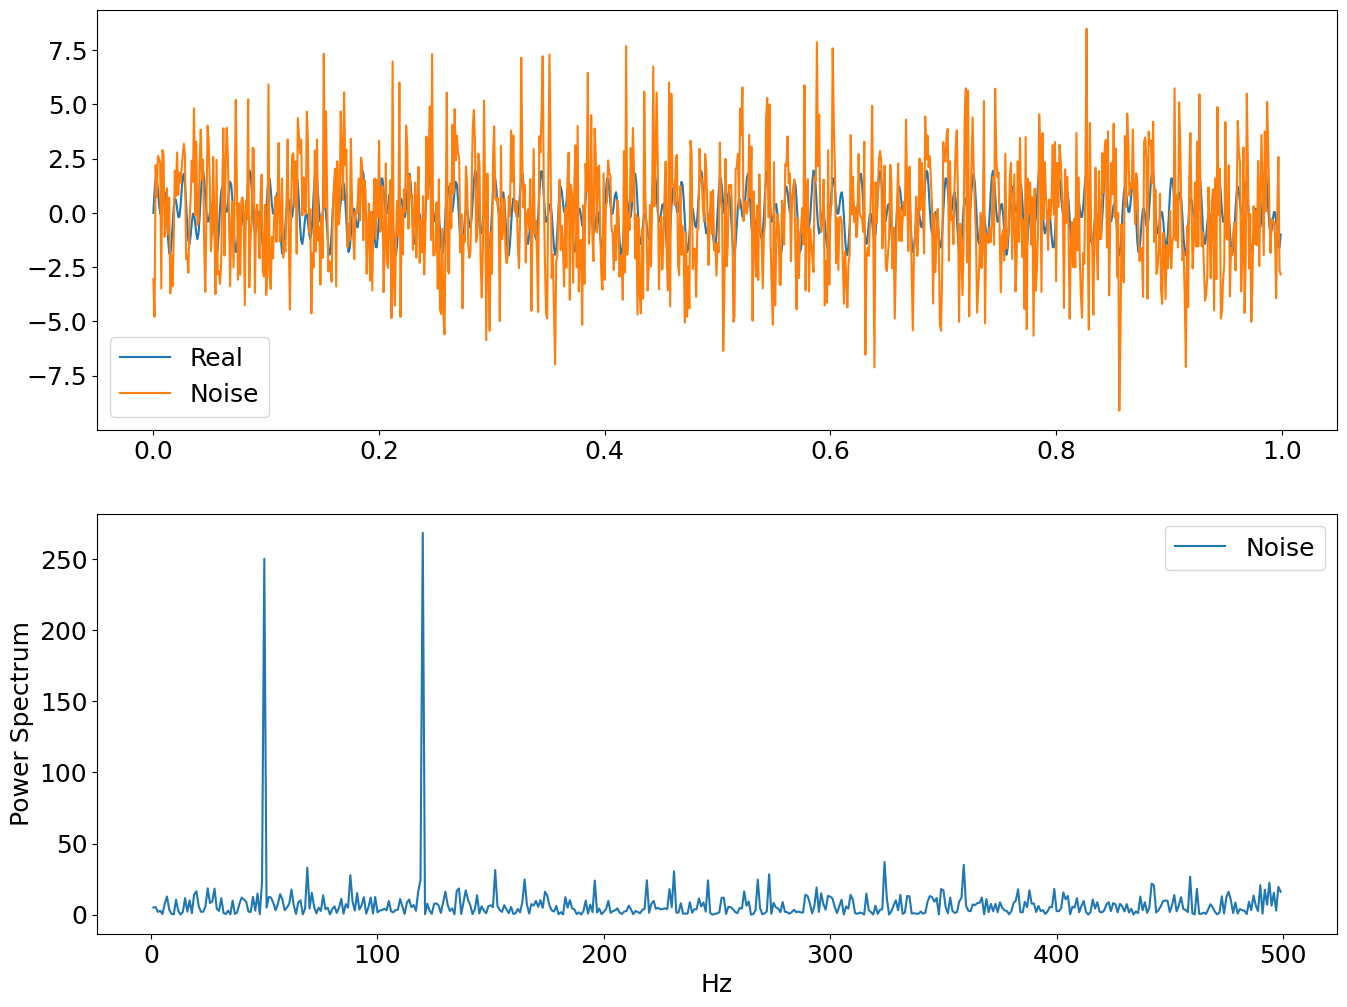

In [12]:
n = len (t)
f_hat = np.fft.fft(f_noise,n)
freq = (1/(dt*n)) * np.arange(n)
L = np.arange(1,np.floor(n/2), dtype='int')

# Power Spectrum -> get the magnitude of the real + complex parts 
PSD = f_hat * np.conj(f_hat) / n

fig,axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(t,f)
plt.plot(t,f_noise)
plt.legend(["Real", "Noise"])

plt.sca(axs[1])
plt.plot(freq[L], PSD[L])
plt.legend(["Noise"])
plt.xlabel("Hz")
plt.ylabel("Power Spectrum")

plt.show()


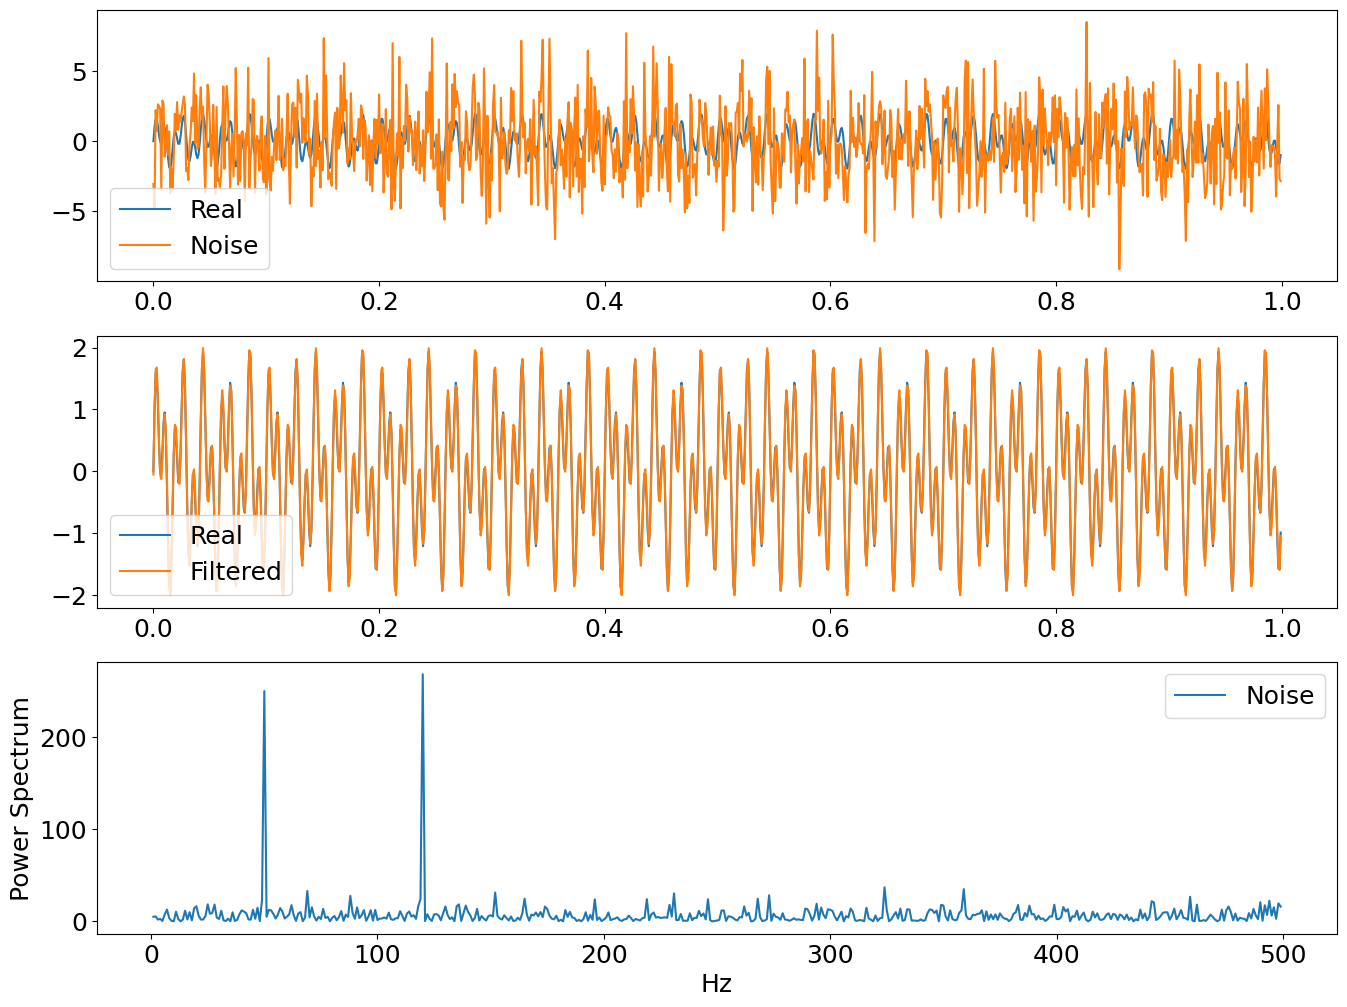

In [15]:

# Zero out all PSD values below 100 and take iFFt
cutoff = 100
index = PSD > cutoff
PSD_Clean = PSD * index
f_hat = index * f_hat
f_cleaned = np.fft.ifft(f_hat)

fig,axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(t,f)
plt.plot(t,f_noise)
plt.legend(["Real", "Noise"])

plt.sca(axs[1])
plt.plot(t,f)
plt.plot(t,f_cleaned)
plt.legend(["Real","Filtered"])

plt.sca(axs[2])
plt.plot(freq[L], PSD[L])
plt.legend(["Noise"])
plt.xlabel("Hz")
plt.ylabel("Power Spectrum")

plt.show()


In [18]:
print(PSD_Clean)

[  0.        +0.00000000e+00j   0.        +0.00000000e+00j
   0.        +0.00000000e+00j   0.        +0.00000000e+00j
   0.        +0.00000000e+00j   0.        +0.00000000e+00j
   0.        +0.00000000e+00j   0.        +0.00000000e+00j
   0.        +0.00000000e+00j   0.        +0.00000000e+00j
   0.        +0.00000000e+00j   0.        +0.00000000e+00j
   0.        +0.00000000e+00j   0.        +0.00000000e+00j
   0.        +0.00000000e+00j   0.        +0.00000000e+00j
   0.        +0.00000000e+00j   0.        +0.00000000e+00j
   0.        +0.00000000e+00j   0.        +0.00000000e+00j
   0.        +0.00000000e+00j   0.        +0.00000000e+00j
   0.        +0.00000000e+00j   0.        +0.00000000e+00j
   0.        +0.00000000e+00j   0.        +0.00000000e+00j
   0.        +0.00000000e+00j   0.        +0.00000000e+00j
   0.        +0.00000000e+00j   0.        +0.00000000e+00j
   0.        +0.00000000e+00j   0.        +0.00000000e+00j
   0.        +0.00000000e+00j   0.        +0.00000000e+0